# 근로감독관 충원에 따른 인력 및 과 설치 방안 분석

## 1. 데이터 수집 및 정제

In [100]:
# 기본 설정
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)
#pd.reset_option('display.float_foramt')

In [101]:
# csv 파일 읽기
file_name = '(250618)branch_rawdata.csv'

df_input = pd.read_csv(file_name, encoding='cp949', thousands=',')

In [102]:
# 파일 컬럼 확인
print(df_input.columns)

Index(['연번', '기관명', '면적', '과수(전체)', '센터수', '과수(감독전체)', '과수(근로전체)', '과수(산안전체)',
       '전체정원', '감독관', '근로', '산안', '관할시군구수', '인구수', '사업체수', '종사자수', '신고사건접수건수',
       '신고사건처리건수', '평균처리일', '지연처리율', '감시단속적근로자적용제외승인', '특별연장근로인가건수',
       '노사협의회및노조설립·변경·해산신고건수', '취업규칙심사건수', '퇴직연금규약접수건수',
       '15세미만취직인허18세미만야간휴일근로 인가', '임산부야간휴일근로인가', '파견사업인가', '최저임금적용제외인가',
       '사내공동근로복지기금인가', '우리사주조합설립및해산신고', '근로감독건수', '정기감독실시업체', '수시감독실시업체',
       '특별감독실시업체', '사업장감독결과금품청산법위반건수', '근로시간위반건수(제50조,제53조)', '휴가위반건수(제60조)',
       '근로조건미명시건수', '부당노동행위위반(제81조)', '직장내괴롭힘적발건수', '현장점검횟수', '현장점검의날지도건수',
       '교육·컨설팅횟수', '안전보건감독건수', '안전보건진단·개선계획수립명령건수(진단)',
       '안전보건진단·개선계획수립명령건수(개선계획)', '안전인증·안전검사·유해위험방지계획서조치건수(안정인증)',
       '안전인증·안전검사·유해위험방지계획서조치건수(안전검사)', '안전인증·안전검사·유해위험방지계획서조치건수(위해위험방지계획서)',
       '산업재해조사표입력건수', '점검·감독', '점검·감독현황(위반사업장)', '점검·감독현황(행정조치)',
       '점검·감독현황(사법조치)', '중대재해', '중대산업사고', '중대재해 작업중지', '사고재해자수', '사망만인율',
       '사고사망만인율', '부상자수', '재해자수', '재해율'],
      dtype='object')


In [103]:
# 파일 내용 확인
df_input.head()

,연번,기관명,면적,과수(전체),센터수,과수(감독전체),과수(근로전체),과수(산안전체),전체정원,감독관,...,점검·감독현황(사법조치),중대재해,중대산업사고,중대재해 작업중지,사고재해자수,사망만인율,사고사망만인율,부상자수,재해자수,재해율
0,1,서울청,95.080,17,2,8,5,3.000,297,146,...,52,78,NaN,5.000,2634,0.470,0.090,2617,3024,0.250
1,2,서울강남지청,39.510,8,1,5,4,1.000,161,88,...,11,9,NaN,5.000,1693,0.470,0.200,1674,1895,0.250
2,3,서울동부지청,92.370,8,2,4,3,1.000,187,82,...,27,23,NaN,4.000,2858,0.780,0.250,2831,3834,0.540
3,4,서울서부지청,93.000,7,1,4,3,1.000,176,71,...,12,14,NaN,7.000,1978,0.640,0.250,1959,2287,0.450
4,5,서울남부지청,83.410,8,2,4,3,1.000,180,75,...,5,4,NaN,2.000,2173,0.750,0.200,2153,2470,0.380


In [104]:
# 감독관 수 컬럼을 타겟 y1으로, 과 수 컬럼을 타겟 y2로 설정
y1 = df_input['감독관']
y2 = df_input['과수(감독전체)']

In [105]:
# 감독관 수 결정을 위한 데이터 셋 만들기
x1_input = df_input[['연번', '기관명', '과수(감독전체)', '감독관', '인구수', '사업체수', '종사자수', '신고사건접수건수', '신고사건처리건수', '평균처리일', '지연처리율', '근로감독건수', '정기감독실시업체',
              '수시감독실시업체', '사업장감독결과금품청산법위반건수', '현장점검횟수', '현장점검의날지도건수', '교육·컨설팅횟수', '안전보건감독건수', '산업재해조사표입력건수', '점검·감독' ,
              '중대재해', '사고재해자수', '사망만인율', '사고사망만인율', '부상자수', '재해자수', '재해율', '면적']]

In [106]:
# 면적은 2차원 값이므로, 1차원 값인 거리를 추가
x1_input['거리'] = x1_input['면적'] ** 0.5

C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\3061509581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_input['거리'] = x1_input['면적'] ** 0.5


In [107]:
# 컬럼 이름 변경
x1_input['01_인구수'] = x1_input['인구수']
x1_input['02_사업체수'] = x1_input['사업체수']
x1_input['03_종사자수'] = x1_input['종사자수']
x1_input['04_신고사건접수건수'] = x1_input['신고사건접수건수']
x1_input['05_신고사건처리건수'] = x1_input['신고사건처리건수']
x1_input['06_근로감독건수'] = x1_input['근로감독건수']
x1_input['07_정기감독실시업체'] = x1_input['정기감독실시업체']
x1_input['08_수시감독실시업체'] = x1_input['수시감독실시업체']
x1_input['09_금품청산법위반건수'] = x1_input['사업장감독결과금품청산법위반건수']
x1_input['10_현장점검횟수'] = x1_input['현장점검횟수']
x1_input['11_현장점검의날지도건수'] = x1_input['현장점검의날지도건수']
x1_input['12_교육컨설팅횟수'] = x1_input['교육·컨설팅횟수']
x1_input['13_안전보건감독건수'] = x1_input['안전보건감독건수']
x1_input['14_산재조사표입력건수'] = x1_input['산업재해조사표입력건수']
x1_input['15_점검감독'] = x1_input['점검·감독']
x1_input['16_중대재해'] = x1_input['중대재해']
x1_input['17_사고재해자수'] = x1_input['사고재해자수']
x1_input['18_부상자수'] = x1_input['부상자수']
x1_input['19_면적'] = x1_input['면적']
x1_input['20_거리'] = x1_input['거리']

C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\2559544420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_input['01_인구수'] = x1_input['인구수']
C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\2559544420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_input['02_사업체수'] = x1_input['사업체수']
C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\2559544420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [108]:
# 감독관 수 판단을 위해서는 감독관 1인당 수치로 변환
# '평균처리일', '지연처리율', '사망만인율', '사고사망만인율', '재해율' 컬럼은 1인당으로 계산하지 않음
x1_input['01_인구수_1인당'] = x1_input['인구수']/x1_input['감독관']
x1_input['02_사업체수_1인당'] = x1_input['사업체수']/x1_input['감독관']
x1_input['03_종사자수_1인당'] = x1_input['종사자수']/x1_input['감독관']
x1_input['04_신고사건접수건수_1인당'] = x1_input['신고사건접수건수']/x1_input['감독관']
x1_input['05_신고사건처리건수_1인당'] = x1_input['신고사건처리건수']/x1_input['감독관']
x1_input['06_근로감독건수_1인당'] = x1_input['근로감독건수']/x1_input['감독관']
x1_input['07_정기감독실시업체_1인당'] = x1_input['정기감독실시업체']/x1_input['감독관']
x1_input['08_수시감독실시업체_1인당'] = x1_input['수시감독실시업체']/x1_input['감독관']
x1_input['09_금품청산법위반건수_1인당'] = x1_input['사업장감독결과금품청산법위반건수']/x1_input['감독관']
x1_input['10_현장점검횟수_1인당'] = x1_input['현장점검횟수']/x1_input['감독관']
x1_input['11_현장점검의날지도건수_1인당'] = x1_input['현장점검의날지도건수']/x1_input['감독관']
x1_input['12_교육컨설팅횟수_1인당'] = x1_input['교육·컨설팅횟수']/x1_input['감독관']
x1_input['13_안전보건감독건수_1인당'] = x1_input['안전보건감독건수']/x1_input['감독관']
x1_input['14_산재조사표입력건수_1인당'] = x1_input['산업재해조사표입력건수']/x1_input['감독관']
x1_input['15_점검감독_1인당'] = x1_input['점검·감독']/x1_input['감독관']
x1_input['16_중대재해_1인당'] = x1_input['중대재해']/x1_input['감독관']
x1_input['17_사고재해자수_1인당'] = x1_input['사고재해자수']/x1_input['감독관']
x1_input['18_부상자수_1인당'] = x1_input['부상자수']/x1_input['감독관']
x1_input['19_면적_1인당'] = x1_input['면적']/x1_input['감독관']
x1_input['20_거리_1인당'] = x1_input['거리']/x1_input['감독관']
x1_input['21_평균처리일'] = x1_input['평균처리일']
x1_input['22_지연처리율'] = x1_input['지연처리율']
x1_input['23_사망만인율'] = x1_input['사망만인율']
x1_input['24_사고사망만인율'] = x1_input['사고사망만인율']
x1_input['25_재해율'] = x1_input['재해율']


C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\1010245928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_input['01_인구수_1인당'] = x1_input['인구수']/x1_input['감독관']
C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\1010245928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1_input['02_사업체수_1인당'] = x1_input['사업체수']/x1_input['감독관']
C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\1010245928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

### 지청별 데이터 산출

In [188]:
# 실제로 사용할 지표만 남기고 나머지는 삭제
x1_v1 = x1_input[['01_인구수', '02_사업체수', '03_종사자수', '04_신고사건접수건수', '05_신고사건처리건수', '06_근로감독건수',
                  '07_정기감독실시업체', '08_수시감독실시업체', '09_금품청산법위반건수', '10_현장점검횟수', '11_현장점검의날지도건수',
                  '12_교육컨설팅횟수', '13_안전보건감독건수', '14_산재조사표입력건수', '15_점검감독', '16_중대재해', '17_사고재해자수',
                  '18_부상자수', '19_면적', '20_거리', '21_평균처리일', '22_지연처리율', '23_사망만인율', '24_사고사망만인율', '25_재해율']]

x1_v1.head()

,01_인구수,02_사업체수,03_종사자수,04_신고사건접수건수,05_신고사건처리건수,06_근로감독건수,07_정기감독실시업체,08_수시감독실시업체,09_금품청산법위반건수,10_현장점검횟수,...,16_중대재해,17_사고재해자수,18_부상자수,19_면적,20_거리,21_평균처리일,22_지연처리율,23_사망만인율,24_사고사망만인율,25_재해율
0,1007159,96342,1118883,11789,10863,1357,1136,221,430,1764,...,78,2634,2617,95.080,9.751,38.120,10.730,0.470,0.090,0.250
1,556506,60696,730965,12226,10923,865,741,124,353,1074,...,9,1693,1674,39.510,6.286,51.680,18.970,0.470,0.200,0.250
2,1750181,73619,735728,10836,9914,749,656,93,52,1883,...,23,2858,2831,92.370,9.611,38.570,10.070,0.780,0.250,0.540
3,1323643,52899,528901,8233,7513,642,582,59,231,1296,...,14,1978,1959,93.000,9.644,50.050,14.480,0.640,0.250,0.450
4,1353895,60319,719842,9804,9153,745,620,125,134,1062,...,4,2173,2153,83.410,9.133,35.150,8.970,0.750,0.200,0.380


### 지청별 감독관 1인당 데이터 산출

In [189]:
# 실제로 사용할 지표만 남기고 나머지는 삭제
x1_v2 = x1_input[['01_인구수_1인당', '02_사업체수_1인당', '03_종사자수_1인당', '04_신고사건접수건수_1인당', '05_신고사건처리건수_1인당', '06_근로감독건수_1인당',
                      '07_정기감독실시업체_1인당', '08_수시감독실시업체_1인당', '09_금품청산법위반건수_1인당', '10_현장점검횟수_1인당', '11_현장점검의날지도건수_1인당',
                      '12_교육컨설팅횟수_1인당', '13_안전보건감독건수_1인당', '14_산재조사표입력건수_1인당', '15_점검감독_1인당', '16_중대재해_1인당', '17_사고재해자수_1인당',
                      '18_부상자수_1인당', '19_면적_1인당', '20_거리_1인당', '21_평균처리일', '22_지연처리율', '23_사망만인율', '24_사고사망만인율', '25_재해율']]

x1_v2.head()

,01_인구수_1인당,02_사업체수_1인당,03_종사자수_1인당,04_신고사건접수건수_1인당,05_신고사건처리건수_1인당,06_근로감독건수_1인당,07_정기감독실시업체_1인당,08_수시감독실시업체_1인당,09_금품청산법위반건수_1인당,10_현장점검횟수_1인당,...,16_중대재해_1인당,17_사고재해자수_1인당,18_부상자수_1인당,19_면적_1인당,20_거리_1인당,21_평균처리일,22_지연처리율,23_사망만인율,24_사고사망만인율,25_재해율
0,6898.349,659.877,7663.582,80.747,74.404,9.295,7.781,1.514,2.945,12.082,...,0.534,18.041,17.925,0.651,0.067,38.120,10.730,0.470,0.090,0.250
1,6323.932,689.727,8306.420,138.932,124.125,9.830,8.420,1.409,4.011,12.205,...,0.102,19.239,19.023,0.449,0.071,51.680,18.970,0.470,0.200,0.250
2,21343.671,897.793,8972.293,132.146,120.902,9.134,8.000,1.134,0.634,22.963,...,0.280,34.854,34.524,1.126,0.117,38.570,10.070,0.780,0.250,0.540
3,18642.859,745.056,7449.310,115.958,105.817,9.042,8.197,0.831,3.254,18.254,...,0.197,27.859,27.592,1.310,0.136,50.050,14.480,0.640,0.250,0.450
4,18051.933,804.253,9597.893,130.720,122.040,9.933,8.267,1.667,1.787,14.160,...,0.053,28.973,28.707,1.112,0.122,35.150,8.970,0.750,0.200,0.380


### 산점도로 변수간 관계 확인

In [192]:
# 산점도로 검증하기
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 또는 다른 한글 폰트 이름
plt.rcParams['axes.unicode_minus'] = False

df_plot = pd.DataFrame()
df_plot['연번'] = x1_input['연번']
df_plot['y1'] = y1
df_plot['06_근로감독건수'] = x1_v1['06_근로감독건수']

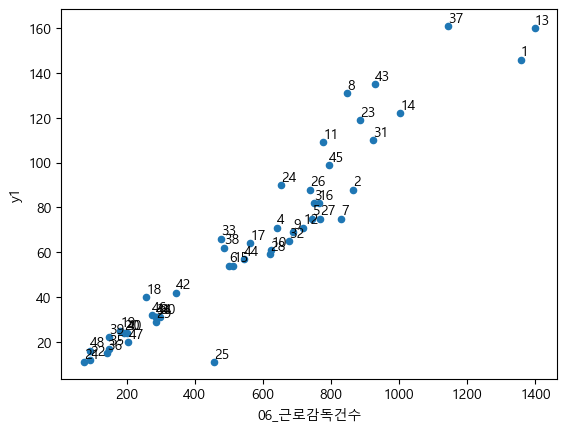

In [193]:
ax = df_plot.plot.scatter(x='06_근로감독건수', y='y1')

for i, row in df_plot.iterrows():
    ax.text(row['06_근로감독건수'] + 0.5, row['y1'] + 0.5, # 좌표 조정
            row['연번'],                           # 'product_name' 컬럼 값을 레이블로
            fontsize=10,
            ha='left',  # horizontal alignment
            va='bottom') # vertical alignment
    
plt.show()

## 2. 회귀분석

### 2-1. Linear Regression 모델 사용

In [203]:
x1_v1.columns

Index(['01_인구수', '02_사업체수', '03_종사자수', '04_신고사건접수건수', '05_신고사건처리건수',
       '06_근로감독건수', '07_정기감독실시업체', '08_수시감독실시업체', '09_금품청산법위반건수', '10_현장점검횟수',
       '11_현장점검의날지도건수', '12_교육컨설팅횟수', '13_안전보건감독건수', '14_산재조사표입력건수', '15_점검감독',
       '16_중대재해', '17_사고재해자수', '18_부상자수', '19_면적', '20_거리', '21_평균처리일',
       '22_지연처리율', '23_사망만인율', '24_사고사망만인율', '25_재해율'],
      dtype='object')

In [205]:
x1_v1_train = x1_v1[['02_사업체수', '03_종사자수', '05_신고사건처리건수', '06_근로감독건수', '10_현장점검횟수', '17_사고재해자수', '20_거리']]

### MinMaxScaling

In [223]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

x1_v1_mm = mm_scaler.fit_transform(x1_v1_train)

x1_v1_mm_df = pd.DataFrame(x1_v1_mm)
x1_v1_mm_df.head()

,0,1,2,3,4,5,6
0,0.740,0.920,0.549,0.969,0.313,0.355,0.045
1,0.452,0.591,0.553,0.597,0.169,0.213,0.000
2,0.556,0.595,0.499,0.510,0.338,0.389,0.043
3,0.389,0.419,0.373,0.429,0.215,0.256,0.043
4,0.449,0.581,0.459,0.507,0.166,0.286,0.037


In [224]:
model = LinearRegression()

model.fit(x1_v1_mm_df, y1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [225]:
print(f"학습된 모델의 절편 (Intercept): {model.intercept_:.2f}")
print(f"학습된 모델의 계수 (Intercept): {model.coef_}")

학습된 모델의 절편 (Intercept): -5.91
학습된 모델의 계수 (Intercept): [  9.10022341  -8.71622535  12.8425402  156.97951468  43.25629004
 -45.2985239   18.72560328]


### 2-1. f_regression(회귀분석) 함수 사용해서 변수 선택

### 정규분포로 변환하기

In [111]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
stan_scaler = StandardScaler()

In [190]:
# 변수들을 표준화 한다.
x1_stan = pd.DataFrame(stan_scaler.fit_transform(x1_v1), columns=x1_v1.columns)

In [113]:
# 표준화된 결과 확인
x1_stan.head()

,01_인구수,02_사업체수,03_종사자수,04_신고사건접수건수,05_신고사건처리건수,06_근로감독건수,07_정기감독실시업체,08_수시감독실시업체,09_금품청산법위반건수,10_현장점검횟수,...,16_중대재해,17_사고재해자수,18_부상자수,19_면적,20_거리,21_평균처리일,22_지연처리율,23_사망만인율,24_사고사망만인율,25_재해율
0,-0.012,1.881,2.661,1.071,1.051,2.420,2.487,2.009,1.296,-0.024,...,0.941,0.299,0.307,-1.093,-1.409,-0.325,-0.057,-0.305,-1.699,-0.781
1,-0.704,0.594,1.227,1.169,1.065,0.914,1.019,0.411,0.794,-0.680,...,-0.700,-0.403,-0.403,-1.125,-1.570,1.296,2.170,-0.305,-1.272,-0.781
2,1.129,1.060,1.244,0.859,0.824,0.559,0.703,-0.099,-1.169,0.090,...,-0.367,0.466,0.469,-1.095,-1.415,-0.272,-0.235,-0.261,-1.077,-0.395
3,0.474,0.312,0.480,0.278,0.249,0.232,0.428,-0.659,-0.002,-0.469,...,-0.581,-0.191,-0.189,-1.095,-1.414,1.101,0.957,-0.281,-1.077,-0.515
4,0.521,0.580,1.186,0.629,0.641,0.547,0.569,0.428,-0.634,-0.692,...,-0.819,-0.045,-0.042,-1.100,-1.437,-0.680,-0.532,-0.265,-1.272,-0.608


### SelectKBest 라이브러리 사용하기

In [114]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

In [200]:
f_select = SelectKBest(score_func=f_regression, k=7)
f_select.fit(x1_stan, y1)

f_scores = pd.DataFrame()
f_scores['scores'] = f_select.scores_
f_scores['p'] = f_select.pvalues_
f_scores['support'] = f_select.get_support()
f_scores['attribute'] = x1_stan.columns

f_scores[f_scores['support'] == True]

,scores,p,support,attribute
1,282.511,0.000,True,02_사업체수
2,202.359,0.000,True,03_종사자수
3,215.367,0.000,True,04_신고사건접수건수
4,211.014,0.000,True,05_신고사건처리건수
5,438.008,0.000,True,06_근로감독건수
6,418.447,0.000,True,07_정기감독실시업체
7,223.580,0.000,True,08_수시감독실시업체


### 2-2. 전진선택법 사용하기

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [163]:
# 전진 선택법 함수 정의 (테스트 세트 사용 안 함)
def forward_selection_no_split(X_data, y_data, initial_features=[]):
    
    selected_features = list(initial_features)
    # 현재까지의 최적 R-제곱 값을 저장합니다.
    best_r2 = -np.inf 
    
    while True:
        best_feature = None
        current_best_r2 = -np.inf
        
        for feature in X_data.columns:
            if feature not in selected_features:
                temp_features = selected_features + [feature]
                
                model = LinearRegression()
                # 모든 X_data를 사용하여 모델을 훈련합니다.
                model.fit(X_data[temp_features], y_data)
                
                # 훈련 데이터에 대한 예측을 수행합니다.
                y_pred = model.predict(X_data[temp_features])
                # 훈련 데이터에 대한 R-제곱 값을 계산합니다.
                r2 = r2_score(y_data, y_pred)
                
                if r2 > current_best_r2:
                    current_best_r2 = r2
                    best_feature = feature
        
        if current_best_r2 > best_r2:
            selected_features.append(best_feature)
            best_r2 = current_best_r2
            print(f"특성 추가: {best_feature}, 현재 R-제곱 (훈련 세트): {best_r2:.4f}")
        else:
            break
            
    return selected_features, best_r2

In [165]:
# 3. 전진 선택법 실행
print("--- 전진 선택법 시작 (전체 데이터 사용) ---")
final_selected_features, final_r2 = forward_selection_no_split(x1_stan, y1)

print("\n--- 전진 선택법 결과 (전체 데이터 사용) ---")
print(f"최종 선택된 특성: {final_selected_features}")
print(f"최종 R-제곱 (훈련 세트): {final_r2:.4f}")

# 4. 최종 모델 학습 및 평가 (전체 데이터 사용)
model = LinearRegression()
model.fit(x1_stan[final_selected_features], y1)
y_pred_final = model.predict(x1_stan[final_selected_features])
final_r2_check = r2_score(y1, y_pred_final)
print(f"최종 모델의 R-제곱 (확인, 전체 데이터): {final_r2_check:.4f}")

--- 전진 선택법 시작 (전체 데이터 사용) ---
특성 추가: 06_근로감독건수, 현재 R-제곱 (훈련 세트): 0.9050
특성 추가: 16_중대재해, 현재 R-제곱 (훈련 세트): 0.9331
특성 추가: 12_교육컨설팅횟수, 현재 R-제곱 (훈련 세트): 0.9441
특성 추가: 08_수시감독실시업체, 현재 R-제곱 (훈련 세트): 0.9495
특성 추가: 20_거리, 현재 R-제곱 (훈련 세트): 0.9521
특성 추가: 07_정기감독실시업체, 현재 R-제곱 (훈련 세트): 0.9552
특성 추가: 04_신고사건접수건수, 현재 R-제곱 (훈련 세트): 0.9569
특성 추가: 17_사고재해자수, 현재 R-제곱 (훈련 세트): 0.9597
특성 추가: 18_부상자수, 현재 R-제곱 (훈련 세트): 0.9647
특성 추가: 19_면적, 현재 R-제곱 (훈련 세트): 0.9701
특성 추가: 01_인구수, 현재 R-제곱 (훈련 세트): 0.9734
특성 추가: 11_현장점검의날지도건수, 현재 R-제곱 (훈련 세트): 0.9771
특성 추가: 24_사고사망만인율, 현재 R-제곱 (훈련 세트): 0.9784
특성 추가: 05_신고사건처리건수, 현재 R-제곱 (훈련 세트): 0.9800
특성 추가: 13_안전보건감독건수, 현재 R-제곱 (훈련 세트): 0.9806
특성 추가: 15_점검감독, 현재 R-제곱 (훈련 세트): 0.9819
특성 추가: 02_사업체수, 현재 R-제곱 (훈련 세트): 0.9848
특성 추가: 10_현장점검횟수, 현재 R-제곱 (훈련 세트): 0.9853
특성 추가: 09_금품청산법위반건수, 현재 R-제곱 (훈련 세트): 0.9855
특성 추가: 03_종사자수, 현재 R-제곱 (훈련 세트): 0.9857
특성 추가: 22_지연처리율, 현재 R-제곱 (훈련 세트): 0.9858
특성 추가: 14_산재조사표입력건수, 현재 R-제곱 (훈련 세트): 0.9858
특성 추가: 21_평균처리일, 현재 R-제곱 (훈련 세트): 0.9859
특성 추가

In [182]:
# y와 y_pred_final 값을 비교하여 데이터프레임 생성
comparison_df = pd.DataFrame({'Actual (y)': y1, 'Predicted (y_pred_final)': y_pred_final})
comparison_df[0:48]


,Actual (y),Predicted (y_pred_final)
0,146,150.725
1,88,85.930
2,82,81.984
3,71,69.502
4,75,71.601
5,54,56.951
6,75,82.959
7,131,127.968
8,69,72.314
9,61,62.317


In [172]:
# y_pred_final 구하는 산식 추출
intercept = model.intercept_
coefficients = model.coef_

equation_terms = []
for i, feature in enumerate(final_selected_features):
    # 계수가 음수일 경우 '-'로 표시하기 위해 조건부 포맷팅
    if coefficients[i] < 0:
        equation_terms.append(f"{coefficients[i]:.4f} * {feature}".replace("-", "- "))
    else:
        equation_terms.append(f"{coefficients[i]:.4f} * {feature}")

# 절편부터 시작하여 산식 문자열 생성
equation_string = f"y_pred_final = {intercept:.4f}"
if equation_terms:
    # 양수 계수는 '+'로 연결하고, 음수 계수는 이미 '-'를 포함하므로 바로 연결
    # 불필요한 '+ -' 패턴을 제거하기 위해 replace 사용
    equation_string += " + " + " + ".join(equation_terms).replace("+ -", "- ")

print(f"\n--- y_pred_final 구하는 산식 ---")
print(equation_string)


--- y_pred_final 구하는 산식 ---
y_pred_final = 65.2708 + 696.7132 * 06_근로감독건수 + 9.3982 * 16_중대재해 + 3.3903 * 12_교육컨설팅횟수 -  135.1455 * 08_수시감독실시업체 + 31.9929 * 20_거리 -  536.1567 * 07_정기감독실시업체 -  52.2116 * 04_신고사건접수건수 -  1468.6198 * 17_사고재해자수 + 1431.6489 * 18_부상자수 -  22.0894 * 19_면적 + 15.6657 * 01_인구수 + 11.8098 * 11_현장점검의날지도건수 + 3.6613 * 24_사고사망만인율 + 85.3647 * 05_신고사건처리건수 -  53.6849 * 13_안전보건감독건수 + 46.5291 * 15_점검감독 -  14.9940 * 02_사업체수 + 2.1339 * 10_현장점검횟수 + 1.4199 * 09_금품청산법위반건수 + 0.1624 * 03_종사자수 -  0.3907 * 22_지연처리율 + 3.5808 * 14_산재조사표입력건수 + 0.4496 * 21_평균처리일 + 6.7122 * 23_사망만인율 -  6.9089 * 25_재해율


In [187]:
model.coef_
model.intercept_


np.float64(65.27083333333336)

In [118]:
# 각 특성(x1_stan)과 타겟(y1) 간의 F-값을 계산하여 통계적으로 가장 중요한 K개의 특성을 선택
# f_regression은 회귀 문제에서 사용되는 통계 테스트입니다.
selector = SelectKBest(score_func=f_regression, k=10)
x1_select = selector.fit_transform(x1_stan, y1)

# 선택된 특성들의 이름 확인
selected_features_indices = selector.get_support(indices=True)
selected_features_names = x1_stan.columns[selected_features_indices]

print("Selected features (Filter method):", selected_features_names)

# X_selected_filter는 numpy 배열이므로 필요시 다시 DataFrame으로 변환
x1_select_df = pd.DataFrame(x1_select, columns=selected_features_names)

Selected features (Filter method): Index(['02_사업체수', '03_종사자수', '04_신고사건접수건수', '05_신고사건처리건수', '06_근로감독건수',
       '07_정기감독실시업체', '08_수시감독실시업체', '14_산재조사표입력건수', '17_사고재해자수', '18_부상자수'],
      dtype='object')


In [119]:
y1

0     146
1      88
2      82
3      71
4      75
5      54
6      75
7     131
8      69
9      61
10    109
11     71
12    160
13    122
14     54
15     82
16     64
17     40
18     25
19     24
20     11
21     12
22    119
23     90
24     11
25     88
26     75
27     59
28     29
29     31
30    110
31     65
32     66
33     31
34     17
35     15
36    161
37     62
38     22
39     24
40     31
41     42
42    135
43     57
44     99
45     32
46     20
47     16
Name: 감독관, dtype: int64

In [120]:
# 감독관 컬럼을 타겟(y)으로 설정
y = df_input['감독관']

# 특성 데이터(x) 만들기
x = df_input[['면적', '과수(감독전체)', '관할시군구수', '인구수', '사업체수', '종사자수', '신고사건접수건수', '신고사건처리건수', '평균처리일', '지연처리율', '근로감독건수', '정기감독실시업체',
              '수시감독실시업체', '사업장감독결과금품청산법위반건수', '현장점검횟수', '현장점검의날지도건수', '교육·컨설팅횟수', '안전보건감독건수', '산업재해조사표입력건수', '점검·감독' ,
              '중대재해', '사고재해자수', '사망만인율', '사고사망만인율', '부상자수', '재해자수', '재해율']]



In [121]:
# 면적은 2차원 값이므로, 1차원 값인 거리를 추가
x['거리'] = x['면적'] ** 0.5

C:\Users\Moel\AppData\Local\Temp\ipykernel_3044\3818797131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['거리'] = x['면적'] ** 0.5


In [122]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   면적                48 non-null     float64
 1   과수(감독전체)          48 non-null     int64  
 2   관할시군구수            48 non-null     int64  
 3   인구수               48 non-null     int64  
 4   사업체수              48 non-null     int64  
 5   종사자수              48 non-null     int64  
 6   신고사건접수건수          48 non-null     int64  
 7   신고사건처리건수          48 non-null     int64  
 8   평균처리일             48 non-null     float64
 9   지연처리율             48 non-null     float64
 10  근로감독건수            48 non-null     int64  
 11  정기감독실시업체          48 non-null     int64  
 12  수시감독실시업체          48 non-null     int64  
 13  사업장감독결과금품청산법위반건수  48 non-null     int64  
 14  현장점검횟수            48 non-null     int64  
 15  현장점검의날지도건수        48 non-null     int64  
 16  교육·컨설팅횟수          48 non-null     int64  
 17 

In [123]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

In [124]:
# X 데이터에 Min-Max Scaling 적용
x_norm = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [125]:
x_norm

,면적,과수(감독전체),관할시군구수,인구수,사업체수,종사자수,신고사건접수건수,신고사건처리건수,평균처리일,지연처리율,...,산업재해조사표입력건수,점검·감독,중대재해,사고재해자수,사망만인율,사고사망만인율,부상자수,재해자수,재해율,거리
0,0.008,0.875,0.214,0.309,0.740,0.920,0.570,0.549,0.390,0.393,...,0.316,0.343,0.362,0.355,0.001,0.000,0.359,0.342,0.000,0.045
1,0.000,0.500,0.000,0.171,0.452,0.591,0.592,0.553,0.747,0.850,...,0.206,0.216,0.029,0.213,0.001,0.092,0.214,0.185,0.000,0.000
2,0.008,0.375,0.214,0.537,0.556,0.595,0.522,0.499,0.402,0.356,...,0.371,0.302,0.097,0.389,0.008,0.134,0.392,0.455,0.057,0.043
3,0.008,0.375,0.214,0.406,0.389,0.419,0.390,0.373,0.704,0.601,...,0.177,0.209,0.053,0.256,0.005,0.134,0.258,0.239,0.039,0.043
4,0.006,0.375,0.143,0.415,0.449,0.581,0.470,0.459,0.312,0.295,...,0.262,0.196,0.005,0.286,0.007,0.092,0.288,0.265,0.025,0.037
5,0.012,0.375,0.286,0.574,0.312,0.267,0.311,0.306,0.418,0.319,...,0.148,0.310,0.058,0.246,0.005,0.050,0.249,0.214,0.074,0.062
6,0.006,0.375,0.214,0.449,0.475,0.463,0.482,0.471,0.314,0.275,...,0.183,0.247,0.058,0.269,0.000,0.084,0.271,0.247,0.037,0.034
7,0.058,0.875,0.357,0.525,0.430,0.424,0.556,0.535,0.529,0.354,...,0.553,0.743,0.643,0.478,0.005,0.151,0.481,0.473,0.082,0.191
8,0.080,0.375,0.214,0.406,0.341,0.306,0.473,0.450,0.438,0.404,...,0.368,0.381,0.174,0.414,0.017,0.504,0.415,0.404,0.108,0.235
9,0.041,0.375,0.071,0.383,0.412,0.311,0.457,0.438,0.324,0.221,...,0.392,0.354,0.126,0.364,0.011,0.345,0.367,0.343,0.100,0.153


In [126]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
stan_scaler = StandardScaler()

In [127]:
x_stan = pd.DataFrame(stan_scaler.fit_transform(x), columns=x.columns)

In [128]:
x_stan.head()

,면적,과수(감독전체),관할시군구수,인구수,사업체수,종사자수,신고사건접수건수,신고사건처리건수,평균처리일,지연처리율,...,산업재해조사표입력건수,점검·감독,중대재해,사고재해자수,사망만인율,사고사망만인율,부상자수,재해자수,재해율,거리
0,-1.093,1.970,-0.294,-0.012,1.881,2.661,1.071,1.051,-0.325,-0.057,...,0.012,-0.051,0.941,0.299,-0.305,-1.699,0.307,0.209,-0.781,-1.409
1,-1.125,0.552,-1.437,-0.704,0.594,1.227,1.169,1.065,1.296,2.170,...,-0.494,-0.624,-0.700,-0.403,-0.305,-1.272,-0.403,-0.555,-0.781,-1.570
2,-1.095,0.079,-0.294,1.129,1.060,1.244,0.859,0.824,-0.272,-0.235,...,0.263,-0.235,-0.367,0.466,-0.261,-1.077,0.469,0.757,-0.395,-1.415
3,-1.095,0.079,-0.294,0.474,0.312,0.480,0.278,0.249,1.101,0.957,...,-0.627,-0.656,-0.581,-0.191,-0.281,-1.077,-0.189,-0.290,-0.515,-1.414
4,-1.100,0.079,-0.675,0.521,0.580,1.186,0.629,0.641,-0.680,-0.532,...,-0.237,-0.714,-0.819,-0.045,-0.265,-1.272,-0.042,-0.166,-0.608,-1.437


In [129]:
x_stan.describe()

,면적,과수(감독전체),관할시군구수,인구수,사업체수,종사자수,신고사건접수건수,신고사건처리건수,평균처리일,지연처리율,...,산업재해조사표입력건수,점검·감독,중대재해,사고재해자수,사망만인율,사고사망만인율,부상자수,재해자수,재해율,거리
count,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,...,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000,48.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,...,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011,...,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011,1.011
min,-1.125,-1.340,-1.437,-1.558,-1.430,-1.344,-1.448,-1.443,-2.097,-1.973,...,-1.438,-1.601,-0.843,-1.454,-0.311,-1.699,-1.458,-1.451,-0.781,-1.570
25%,-0.949,-0.867,-0.675,-0.870,-0.866,-0.891,-0.901,-0.900,-0.686,-0.643,...,-0.798,-0.679,-0.605,-0.740,-0.258,-0.689,-0.739,-0.688,-0.329,-0.986
50%,-0.274,-0.158,-0.294,0.032,-0.047,-0.043,-0.046,-0.005,-0.235,-0.227,...,-0.133,-0.143,-0.260,-0.119,-0.233,-0.126,-0.116,-0.174,-0.183,-0.020
75%,0.650,0.552,0.468,0.502,0.555,0.477,0.648,0.638,0.631,0.636,...,0.629,0.461,0.013,0.526,-0.201,0.641,0.528,0.490,-0.033,0.783
max,2.788,2.443,3.898,3.449,3.047,3.009,2.974,3.096,2.445,2.902,...,3.152,2.918,4.081,3.479,5.986,2.922,3.461,3.397,6.014,2.054


In [130]:
from sklearn.feature_selection import SelectKBest, f_regression

In [131]:
# X_normalized: 정규화된 특성 DataFrame
# y: 감독관(타겟) Series

# 각 특성과 타겟(y) 간의 F-값을 계산하여 통계적으로 가장 중요한 K개의 특성을 선택
# f_regression은 회귀 문제에서 사용되는 통계 테스트입니다.
selector = SelectKBest(score_func=f_regression, k=3)
x_select = selector.fit_transform(x_stan, y)

# 선택된 특성들의 이름 확인
selected_features_indices = selector.get_support(indices=True)
selected_features_names = x_stan.columns[selected_features_indices]

print("Selected features (Filter method):", selected_features_names)

# X_selected_filter는 numpy 배열이므로 필요시 다시 DataFrame으로 변환
x_select_df = pd.DataFrame(x_select, columns=selected_features_names)

Selected features (Filter method): Index(['과수(감독전체)', '근로감독건수', '정기감독실시업체'], dtype='object')


In [132]:
feature_scores = pd.DataFrame({
    'Feature': x_stan.columns, # 모든 특성 이름
    'F_Score': selector.scores_, # 각 특성의 F-값
    'P_value': selector.pvalues_
})

In [133]:
feature_scores

,Feature,F_Score,P_value
0,면적,1.649,0.206
1,과수(감독전체),415.450,0.000
2,관할시군구수,9.806,0.003
3,인구수,41.917,0.000
4,사업체수,282.511,0.000
5,종사자수,202.359,0.000
6,신고사건접수건수,215.367,0.000
7,신고사건처리건수,211.014,0.000
8,평균처리일,0.916,0.344
9,지연처리율,1.533,0.222


In [134]:

print(feature_scores.sort_values(by='F_Score', ascending=False))

             Feature  F_Score  P_value
10            근로감독건수  438.008    0.000
11          정기감독실시업체  418.447    0.000
1           과수(감독전체)  415.450    0.000
4               사업체수  282.511    0.000
12          수시감독실시업체  223.580    0.000
6           신고사건접수건수  215.367    0.000
7           신고사건처리건수  211.014    0.000
5               종사자수  202.359    0.000
24              부상자수  146.518    0.000
21            사고재해자수  145.199    0.000
25              재해자수  116.291    0.000
18       산업재해조사표입력건수   92.546    0.000
14            현장점검횟수   89.336    0.000
19             점검·감독   84.357    0.000
17          안전보건감독건수   80.599    0.000
20              중대재해   69.633    0.000
13  사업장감독결과금품청산법위반건수   65.126    0.000
15        현장점검의날지도건수   46.226    0.000
3                인구수   41.917    0.000
23           사고사망만인율   15.479    0.000
16          교육·컨설팅횟수   11.387    0.002
2             관할시군구수    9.806    0.003
26               재해율    6.023    0.018
22             사망만인율    5.073    0.029
27                거리    2

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X_normalized: 정규화된 특성 DataFrame
# y: 감독관(타겟) Series

# Linear Regression 모델을 기반으로 RFE 수행
estimator = LinearRegression() # 중요도를 판단할 모델 (여기서는 선형 회귀)

In [136]:
# RFE 객체 생성: estimator를 사용하여 15개의 특성만 남기도록 설정
selector_rfe = RFE(estimator=estimator, n_features_to_select=15, step=1) # step=1은 한 번에 1개씩 제거

# 특성 선택 과정 실행
X_selected_wrapper = selector_rfe.fit_transform(x_stan, y)

# 선택된 특성들의 이름 확인
selected_features_rfe_indices = selector_rfe.get_support(indices=True)
selected_feature_rfe_names = x_stan.columns[selected_features_rfe_indices]

print("Selected features (Wrapper method - RFE):", selected_feature_rfe_names)

# X_selected_wrapper는 numpy 배열이므로 필요시 다시 DataFrame으로 변환
X_selected_wrapper_df = pd.DataFrame(X_selected_wrapper, columns=selected_feature_rfe_names)

Selected features (Wrapper method - RFE): Index(['면적', '인구수', '사업체수', '신고사건접수건수', '신고사건처리건수', '근로감독건수', '정기감독실시업체',
       '수시감독실시업체', '현장점검의날지도건수', '안전보건감독건수', '점검·감독', '중대재해', '사고재해자수', '부상자수',
       '거리'],
      dtype='object')


In [137]:
selector_rfe.estimator_.coef_
#selector_rfe.estimator_.intercept_

array([  -22.4384267 ,    14.8633619 ,   -15.53255209,   -15.84354033,
          45.48840797,   722.78374117,  -556.57167279,  -138.45455144,
          10.42461916,   -72.86240772,    68.89159107,     9.76843264,
       -1087.9498098 ,  1057.80849169,    33.20616887])

In [138]:
selector_rfe

,estimator,LinearRegression()
,n_features_to_select,15
,step,1
,verbose,0
,importance_getter,'auto'
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [139]:
selector_rfe._parameter_constraints

{'estimator': [<sklearn.utils._param_validation.HasMethods at 0x27fa99748f0>],
 'n_features_to_select': [None,
 'step': [<sklearn.utils._param_validation.Interval at 0x27fa9974a10>,
 'verbose': ['verbose'],
 'importance_getter': [str, <function callable(obj, /)>]}

In [140]:
intercept = selector_rfe.estimator_.intercept_
features_weights = selector_rfe.estimator_.coef_

# Create a DataFrame to pair feature names with their weights
weights_df = pd.DataFrame({
    'Feature': selected_features_names,
    'Weight': features_weights
})

weights_df


ValueError: All arrays must be of the same length